本书配套视频课程：[解剖深度学习原理，从0实现深度学习库](https://ke.qq.com/course/2900371?tuin=ac5537fd) 

更多代码或学习资料将向购买视频课程或书的学生提供。


+ 博客网站：[https://hwdong-net.github.io](https://hwdong-net.github.io)
+ youtube频道: [hwdong](http://www.youtube.com/c/hwdong)
+ bilibili网站：[hw-dong](https://space.bilibili.com/281453312)

## 3.5 逻辑回归


二分类交叉熵损失：

$$\mathcal L(\pmb w) = -\frac{1}{m}\sum_{i=1}^{m}\bigl (y^i log(f_{\pmb w}({\pmb x}^i)) +(1-y^i) log(1-f_{\pmb w}({\pmb x}^i))\bigr ) $$

将样本写成行向量形式，梯度$\nabla_{\pmb w} { L(\pmb w)}$也写成行向量形式，可表示为：

 $$\nabla_{\pmb w} { L(\pmb w)} = \frac{1}{m} {\bigl( \pmb f- \pmb y \bigr )}^T X =  \frac{1}{m} {\bigl( \sigma(\pmb X \pmb w)- \pmb  y \bigr )}^T X \tag{3-38}$$
 
将样本写成列向量形式， 将梯度写成行向量形式，则：

$$\begin{aligned} \nabla_{\pmb w} { L(\pmb w)} &= \begin{bmatrix}
\frac {\partial L(\pmb w)} {\partial {w_0} }  &
\frac {\partial L(\pmb w)} {\partial {w_1} } &
\frac {\partial L(\pmb w)} {\partial {w_2} } &
\cdots &
\frac {\partial L(\pmb w)} {\partial {w_K} } &
\end{bmatrix}= \frac{1}{m} {\bigl (\pmb f-\pmb y\bigr )} {\pmb X}^T \end{aligned} \tag{3-39}$$

给逻辑回归的损失函数添加正则化，即$L(\pmb w)$为：

$$L(\pmb w) = -\frac{1}{m}\sum_{i=1}^{m}(y^i log(f_{\pmb w}({\pmb x}^i)) +(1-y^i) log(1-f_{\pmb w}({\pmb x}^i))) + \lambda \|{\pmb w}\|^2 \tag{3-40}$$

相应的，$L(\pmb w)$关于$\pmb w$的梯度就是：

$$ \nabla_{\pmb w} { L(\pmb w)}  = \frac{1}{m}\sum_{i=1}^{m} (f_{\pmb w}({\pmb x}^i)-y^i){\pmb x}^i+2\lambda \pmb w \tag{3-41}$$

如果每个样本$\pmb x$是行向量形式，多个样本的$\pmb f, \pmb y$和模型参数$\pmb w$都是列向量形式，则可以写成如下的向量形式：

 $$\nabla_{\pmb w} { L(\pmb w)} = \frac{1}{m} {\bigl( \pmb f- \pmb y \bigr )}^T X + 2\lambda \pmb w =  \frac{1}{m} {\bigl( \sigma(\pmb X \pmb w)- \pmb  y \bigr )}^T X + 2\lambda \pmb w \tag{3-42}$$

### 3.5.2 逻辑回归的numpy实现

#### 1. 生成数据

用np.random.normal()生成服从不同正态分布的2组二维坐标点数据集合Xa和Xb，每个样本表示二维平面上的一个坐标点。Xa中的样本是围绕中心点(10,12)的正态分布的采样点，Xb中的样本是围绕中心点(5,6)的正态分布的采样点。代码用不同颜色表示这些样本以区别它们所属的类别。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Persistent random data
np.random.seed(0)

n_pts = 100
D = 2

#x0 = np.ones(n_pts)
Xa = np.array([#x0,
               np.random.normal(10, 2, n_pts),
               np.random.normal(12, 2, n_pts)])
Xb = np.array([#x0,
               np.random.normal(5, 2, n_pts),
               np.random.normal(6, 2, n_pts)])


X = np.append(Xa, Xb, axis=1).T
#y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
y = (np.append(np.zeros(n_pts), np.ones(n_pts))).T
print(X[::50])
print(y[::50])

[[13.52810469 15.76630139]
 [ 8.20906688 11.86351679]
 [ 4.26163632  3.3869463 ]
 [ 6.04212975  4.47171215]]
[0. 0. 1. 1.]


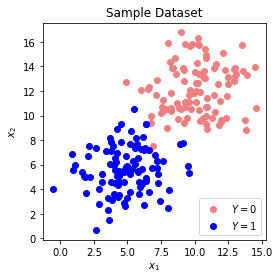

In [2]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:n_pts,0], X[:n_pts,1], color='lightcoral',
          label='$Y = 0$')
ax.scatter(X[n_pts:,0], X[n_pts:,1], color='blue',
          label='$Y = 1$')
ax.set_title('Sample Dataset')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc=4);

#### 2. 梯度下降法的代码实现

逻辑回归的基于动量法的梯度下降法：

In [5]:
def sigmoid(z):    
    return 1 / (1 + np.exp(-z))

def gradient_descent_logistic_reg(X, y, lambda_, alpha, num_iters,gamma = 0.8,epsilon=1e-8):
    #cost_history = []          # create a vector to store the cost history
    w_history = []          # 记录迭代过程中的参数
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype),X))  #添加一列特征1    
    num_features = X.shape[1] 
    v= np.zeros_like(num_features)
    w = np.zeros(num_features)    
    for n in range(num_iters):
        predictions = sigmoid(X @ w)                 #求假设函数的预测值，即f(x)
        errors = predictions - y                   # 预测值和真实值的误差
        #gradient = X.transpose() @ errors /len(y)        #计算梯度
        gradient = errors.transpose() @ X /len(y)        #计算梯度
        loss_grad = errors /len(y)
       
       
        gradient += 2*lambda_*w
        if np.max(np.abs(gradient))<epsilon:
            print("gradient is small enough!")
            print("iterated num is :",n)
            break
        #w -= alpha * gradient        #更新模型的参数
        v = gamma*v+alpha* gradient
        w= w-v             
        
        #cost = - np.mean((np.log(predictions).T * y+np.log(1-predictions).T *(1-y) ))
        #cost_history.append(cost) 
        w_history.append(w)     
            
    return w_history                  # return optimized parameters and cost history

#### 3. 计算损失函数值

对于一个$w$和一组样本$(X,y)$，可用下列函数计算损失函数值：

In [6]:
def loss_logistic(w,X,y,reg=0.):   
    f = sigmoid(X @ w[1:]+w[0])
    loss = -np.mean((np.log(f).T * y+np.log(1-f).T *(1-y) ))
    loss += reg*( np.sum(np.square(w)))
    return loss

def loss_history_logistic(w_history,X,y,reg=0.):
    #X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype),X)) 
    loss_history = []
    for w in w_history:
        loss_history.append(loss_logistic(w,X,y,reg))
    return loss_history

w: [11.3920102  -0.55377808 -0.83931251]
[0.6577262444936194, 0.2267463703642394, 0.15646446608041154, 0.12698570286225017, 0.11034864425987873, 0.09949355960364478, 0.09177469381378581, 0.08596435646154407, 0.08141010065377202, 0.07773089221384288]


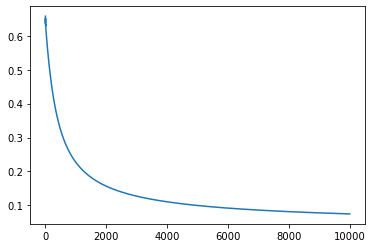

In [7]:
reg = 0.0
alpha=0.01
iterations=10000
w_history = gradient_descent_logistic_reg(X,y,reg,alpha,iterations)
w = w_history[-1]
print("w:",w)

loss_history = loss_history_logistic(w_history,X,y,reg)
print(loss_history[:-1:len(loss_history)//10])
plt.plot(loss_history)

#### 4. 决策曲线

对一组{$x_1$}，根据$\pmb w$算出其对应的{$x_2 = -w_0/w_2-w_1*x_1/w_2$}，然后在$(x_1,x_2)$坐标平面上绘制这些点对应的决策直线，可以看出学习到的模型可以很好地区分这2个类别的样本。绘制的代价曲线也反应了算法是逐渐收敛的。

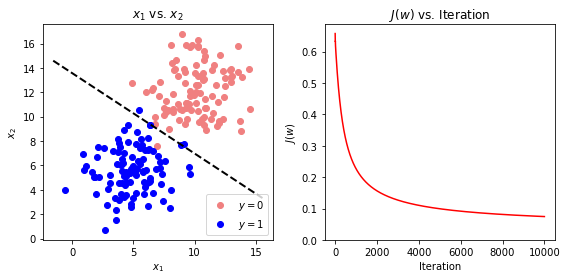

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

x1 = np.array([X[:,0].min()-1, X[:,0].max()+1])
x2 = - w.item(0) / w.item(2) + x1 * (- w.item(1) / w.item(2))

# Plot decision boundary？？？
ax[0].plot(x1, x2, color='k', ls='--', lw=2)

ax[0].scatter(X[:int(n_pts),0], X[:int(n_pts),1], color='lightcoral', label='$y = 0$')
ax[0].scatter(X[int(n_pts):,0], X[int(n_pts):,1], color='blue', label='$y = 1$')
ax[0].set_title('$x_1$ vs. $x_2$')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].legend(loc=4)

ax[1].plot(loss_history, color='r')
ax[1].set_ylim(0,ax[1].get_ylim()[1])
ax[1].set_title(r'$J(w)$ vs. Iteration')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel(r'$J(w)$')

fig.tight_layout()

#### 5. 预测的准确性

In [9]:
X_1 = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype),X))  #添加一列特征1
y_predictions = sigmoid(X_1 @ w)>=0.5

print ('预测的准确度是: %d ' % float((np.dot(y, y_predictions) 
                               + np.dot(1 - y,1 - y_predictions)) / float(y.size) * 100) +'% ')

预测的准确度是: 98 % 


#### 6. Scikit-Learn库的逻辑回归

Scikit score:  0.98
预测的准确度是: 98 % 


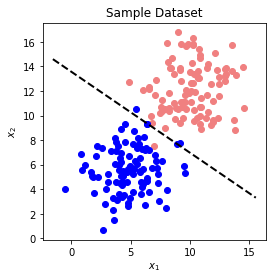

In [10]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

scikit_log_reg = sklearn.linear_model.LogisticRegression();
scikit_log_reg.fit(X,y)

#Score is Mean Accuracy
scikit_score = scikit_log_reg.score(X,y)
print('Scikit score: ', scikit_score)

# Print accuracy
y_predictions = scikit_log_reg.predict(X)
print ('预测的准确度是: %d ' % float((np.dot(y, y_predictions) 
        + np.dot(1 - y,1 - y_predictions)) / float(y.size) * 100) +    '% ' )

#plot_decision_boundary(lambda x: clf.predict(x), X, Y)
# Plot decision boundary
x1 = np.array([X[:,0].min()-1, X[:,0].max()+1])
x2 = - w.item(0) / w.item(2) + x1 * (- w.item(1) / w.item(2))

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:n_pts,0], X[:n_pts,1], color='lightcoral',
          label='$Y = 0$')
ax.scatter(X[n_pts:,0], X[n_pts:,1], color='blue',
          label='$Y = 1$')
ax.set_title('Sample Dataset')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

ax.plot(x1, x2, color='k', ls='--', lw=2)